In [1]:
%load_ext autoreload
%autoreload 2

import pyleoclim.api as pyleo
import pandas as pd
import numpy as np
from pyleoclim import examples

## Series

In [2]:
soi_data = examples.load_dataset('soi', skiprows=1)
soi_data['Date'] = pd.to_datetime(soi_data['Date'], format='%Y%m')
nt = len(soi_data)
to = np.linspace(1951, 2020-1/12, nt)
Xo = soi_data['Value'].values

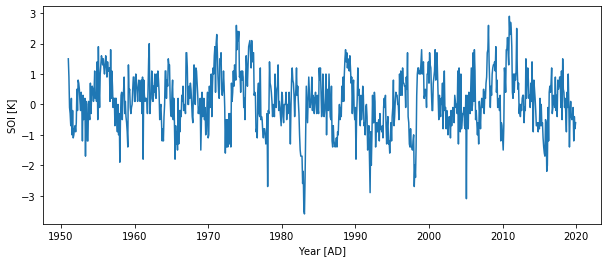

In [3]:
ts = pyleo.Series(time=to, value=Xo, time_name='Year', time_unit='AD', value_name='SOI', value_unit='K')
# print(ts)

fig, ax = ts.plot()

In [4]:
# fig, ax = ts.plot(savefig_settings={'path': './figs/soi.pdf'})

# possible usage cases below
# fig, ax = ts.plot(savefig_settings={'path': './figs/soi', 'format': 'png', 'dpi': 300})
# fig, ax = ts.plot(savefig_settings={'path': './figs/soi', 'format': 'eps'})
fig, ax = ts.plot(savefig_settings={'path': './figs/new/soi', 'format': 'eps'})

Saving figure to: figs/new/soi.eps ...


## Spectral analysis on the Series

In [6]:
%%time
psd = ts.spectral(settings={'nMC': 0})
# print(psd)

CPU times: user 1min 9s, sys: 298 ms, total: 1min 10s
Wall time: 13.7 s


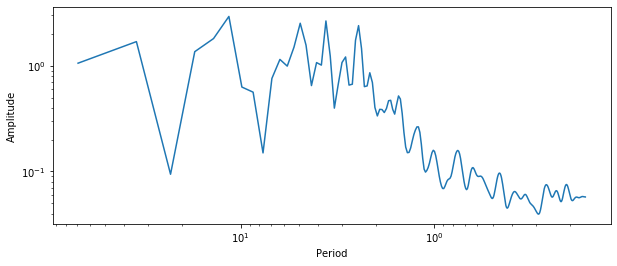

In [8]:
fig, ax = psd.plot()

## Wavelet analysis on the Series

In [9]:
%%time
scal = ts.wavelet(settings={'nMC': 0})

CPU times: user 1min 12s, sys: 163 ms, total: 1min 12s
Wall time: 12.7 s


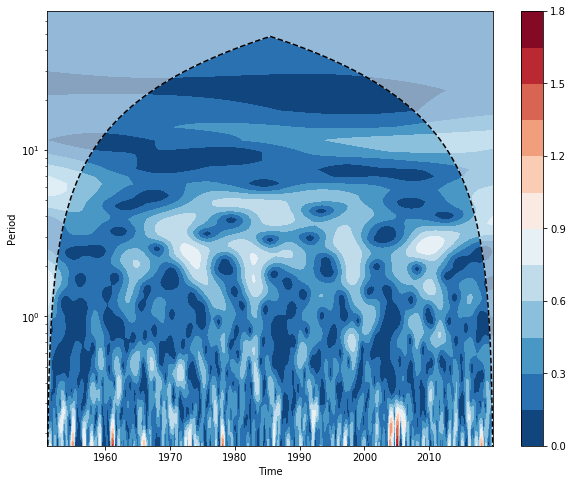

In [9]:
fig, ax = scal.plot()

## Wavelet coherence analysis on two Series objs

In [10]:
import scipy.io as sio
import matplotlib.pyplot as plt

data = sio.loadmat('../example_data/wtc_test_data_nino.mat')
air = data['air'][:, 0]
nino = data['nino'][:, 0]
t = data['datayear'][:, 0]

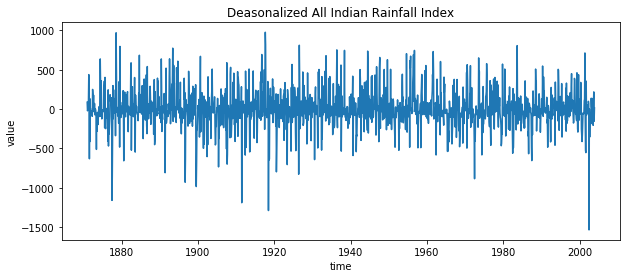

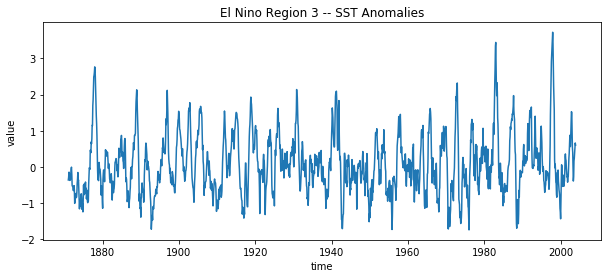

In [11]:
ts_air = pyleo.Series(time=t, value=air)
ts_nino = pyleo.Series(time=t, value=nino)

fig, ax = ts_air.plot(title='Deasonalized All Indian Rainfall Index')
fig, ax = ts_nino.plot(title='El Nino Region 3 -- SST Anomalies')

In [13]:
coh = ts_air.wavelet_coherence(ts_nino, settings={'nMC': 0})

Setting tau=[1871.         1871.84126582 1872.68253165]...[2002.23746835 2003.07873418 2003.92      ], ntau=159
Setting freqs=[0.01220703 0.0129329  0.01370193]...[5.56811699 5.89921445 6.25      ], nfreqs=109


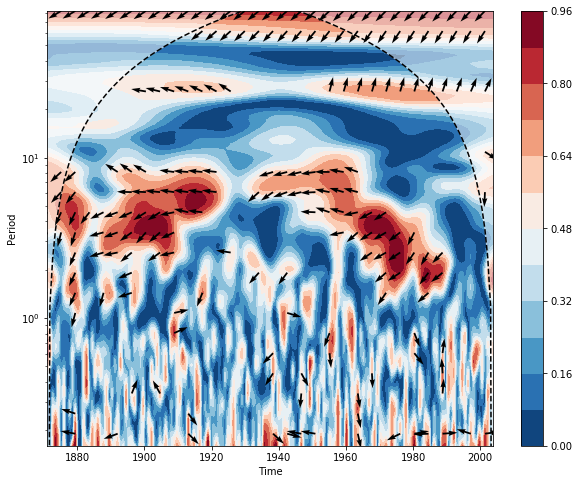

In [14]:
fig, ax = coh.plot()

## Correlation analysis

In [15]:
corr_res = ts_air.correlation(ts_nino)
print(corr_res)

{'r': -0.15239413332839044, 'signif': True, 'pvalue': 0.0}


## Causality analysis

In [16]:
causal_res = ts_air.causality(ts_nino)
print(causal_res)

Calculating causality between surrogates: 100%|██████████| 1000/1000 [00:00<00:00, 1837.76it/s]

{'T21': 0.01644548028633629, 'tau21': 0.011968992003857067, 'Z': 1.3740071244960856, 'signif_qs': [0.005, 0.025, 0.05, 0.95, 0.975, 0.995], 'T21_noise': array([-1.12253977e-04, -5.07240348e-05, -2.23878269e-05,  2.86083492e-03,
        3.70710920e-03,  5.11996752e-03]), 'tau21_noise': array([-8.33552020e-05, -3.76449592e-05, -1.66127431e-05,  2.11585617e-03,
        2.73618445e-03,  3.78464970e-03])}
